# Unsupervised learning

In this practical we will look at some methods for clustering un-labelled data.
We will start with the simple k-means method for clustering and then progress to the Gaussian Mixture Method.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np
from utils import plot_kmeans, plot_gmm
print(plt.style.available)
plt.style.use('fivethirtyeight')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Generate some data

`scikit-learn` allows us to automatically generate a nice unlabeled data set.
```
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
```

In [24]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

## Inspect data

* Plot the data using `plt.scatter(X[:, 0], X[:, 1])`
* Look at the data and decide how many clusters are appropriate

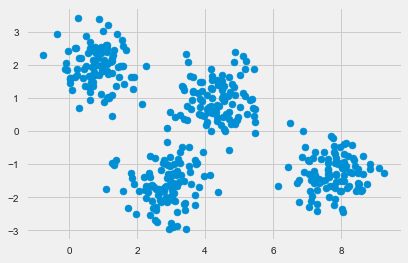

In [25]:
plt.scatter(X[:, 0], X[:, 1])

## Cluster the data with k-means

* Import the `kmeans` function from `scikit-learn` : `from sklearn.cluster import KMeans`
* Now set up an isntance of `Kmeans` with the number n of clusters you choose : `kmeans = KMeans(<n>, random_state=0)`
* Fit the lables: `labels = kmeans.fit(X).predict(X)`
* Plot the result - colour the points according to cluster: `plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')`

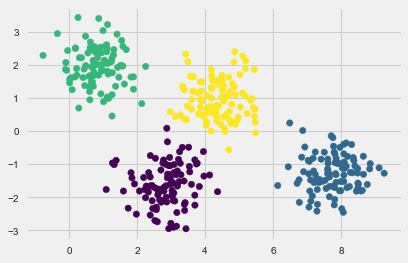

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

## Look at the cluster regions

* There is a helper function in `utils` that will plot the region of each cluster
* `plot_kmeans(kmeans, X)`

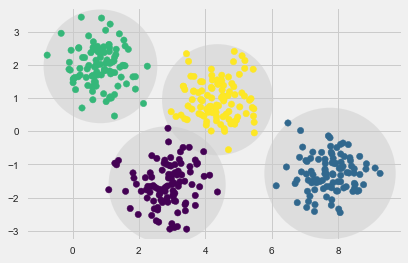

In [27]:
plot_kmeans(kmeans, X)

# Transform the data and cluster

* Apply a stretching function to your data using the code:
```
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
```
* Take a look at the resulting raw data with a scatter plot 
* Try clustering with k-means, use the same functions and plotting function as above - is it satisfactory?

In [28]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

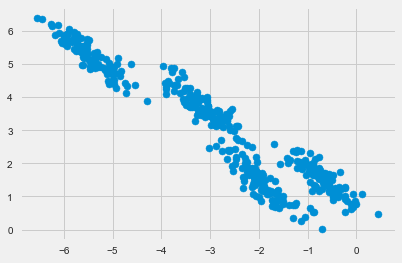

In [29]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1])

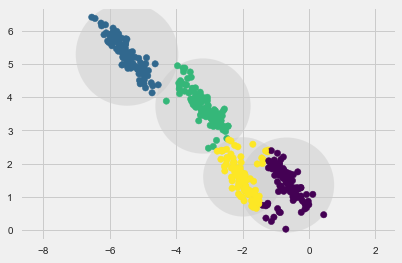

In [30]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Introducing the Gaussian mixture method

 * Import the GMM from scikit-learn: `from sklearn.mixture import GaussianMixture as GMM`
 * Set up a GMM and fit the dataset `X` with n centres, using the same n as above: `gmm = GMM(n_components=<n>).fit(X)`
 * Obtain the labels using `labels = gmm.predict(X)`
 * Plot a scatter plot with the colours based on labels, as above.

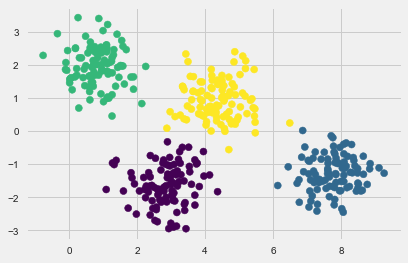

In [31]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

## Look at probabilities

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the `predict_proba` method. This returns a matrix of size `[n_samples, n_clusters]` which measures the probability that any point belongs to the given cluster. use the code below to see the probability assignments of the first five points:

```
probs = gmm.predict_proba(X)
print(probs[:5].round(3))
```

In [32]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


## Plot with probabilities

You can set the size of the points in the plot based on the likelihod that it belongs to a cluster - larger means greater certainty.
```
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
```

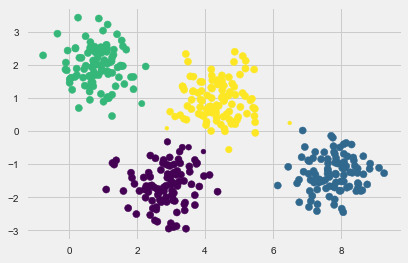

In [33]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

## Apply the GMM to the more complicated data set

We now use the GMM to try to cluster the more difficult to separate data set.
You can run `gmm = GMM(n_components=<n>, covariance_type='full', random_state=6)` with n set to the number of clusters you want.
We have a helper function `plot_gmm` to plot the results `plot_gmm(gmm, <input_data>)` here `input_data` will be `X_stretched`

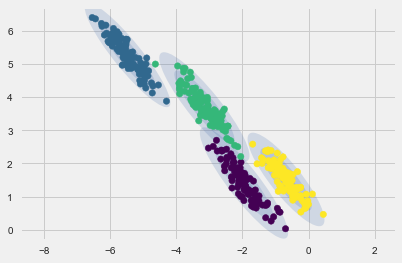

In [34]:
gmm = GMM(n_components=4, covariance_type='full', random_state=6)
plot_gmm(gmm, X_stretched)

## Choosing covariance type

You may have noticed in that we set a parameter called `covariance_type`, this controls the shape of clustering that is possible. It can take values of `spherical`/`diag`/`full`. These get progressively more flexible, but also more expensive to calculate, particularly if the nnumber of clusters is large it can be important to coose the right one. Try playing with this setting and see how the clustering changes.

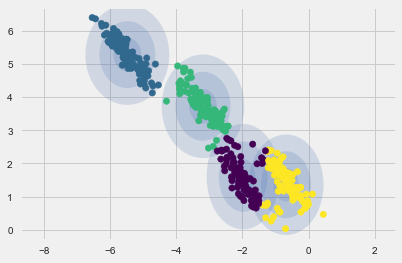

In [36]:
gmm = GMM(n_components=4, covariance_type='diag', random_state=6)
plot_gmm(gmm, X_stretched)

## How many clusters to choose?

It seems a little frustrating that we need to choose the number of clusters by hand. Is there a rigorous way of selecting this?

The answer is yes - because the GMM gives us a distribution of probabilties it can be used to generate new samples within that distribution. We can then estimate the likelihood that the data we have observed would be generated by a particular GMM. So we can generate a set of GMMs with different numbers of clusters and see which one has the maximum likelihood of generating our observed data.

### Step 1

Make a list of GMMs with different numbers of clusters
```
n_components = np.arange(1, 8)
models = [GMM(n, covariance_type='full', random_state=6).fit(X_stretched)
          for n in n_components]
```

In [37]:
n_components = np.arange(1, 8)
models = [GMM(n, covariance_type='full', random_state=6).fit(X_stretched)
          for n in n_components]

### Step 2

See how well each of the models matches the data. The GMM in `scikit-learn` has a couple of built-in estimators for telling us exactly this, they are the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).

We can get a list of `aic` and `bic` values for each of the models
```
bics = [m.bic(X_stretched) for m in models]
aics = [m.aic(X_stretched) for m in models]
```

In [38]:
bics = [m.bic(X_stretched) for m in models]
aics = [m.aic(X_stretched) for m in models]

### Step 3

Plot your results, the AIC/BIC against the number of clusters.

Text(0.5, 0, 'n_components')

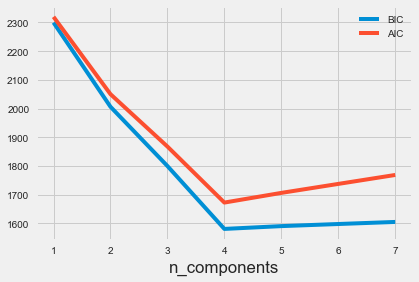

In [39]:
plt.plot(n_components, aics, label='BIC')
plt.plot(n_components, bics, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

## Extra work

If you managed to get through all of that, why not try playing with these methods on a slightly more complicated dataset. The famous 'Two Moons' dataset can be generated in `scikit-learn`. Work out the best number of GMM clusters for replicating this data.

```
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])
```

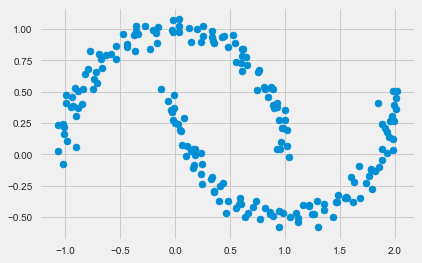

In [40]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])